In [1]:
import sys

sys.path.append("../../")

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scienceplots
import seaborn as sns

from src.eval import (
    Study,
    plot_best_mae_box,
    plot_best_mae_over_time,
    plot_final_beam_parameter_error_box,
    plot_final_mae_box,
    plot_mae_over_time,
    plot_steps_to_convergence_box,
    plot_steps_to_threshold_box,
)
from src.trial import load_trials

In [3]:
plt.style.use(["science", "nature"])

In [4]:
FIG_DIR = "figures"
DATA_DIR = "../../data/bo_vs_rl"

In [5]:
rl_v1_sim = Study.load(f"{DATA_DIR}/simulation/rl", name="RL (Sim)", runs="*problem_*")
bo_sim = Study.load(f"{DATA_DIR}/simulation/bo", name="BO (Sim)", runs="*problem_*")

In [6]:
trial_index = 38

rl_episode = rl_v1_sim.get_episodes_by_problem(trial_index)[0]
bo_episode = bo_sim.get_episodes_by_problem(trial_index)[0]

trial = load_trials(f"{DATA_DIR}/../trials.yaml")[trial_index]

In [7]:
print(f"{rl_episode.best_mae() = }")
print(f"{rl_episode.steps_to_convergence(threshold=4e-5) = }")
print(f"{rl_episode.steps_to_threshold(threshold=4e-5) = }")

print(f"{bo_episode.best_mae() = }")
print(f"{bo_episode.steps_to_convergence(threshold=4e-5) = }")
print(f"{bo_episode.steps_to_threshold(threshold=4e-5) = }")

rl_episode.best_mae() = 6.566915544681251e-07
rl_episode.steps_to_convergence(threshold=4e-5) = 6
rl_episode.steps_to_threshold(threshold=4e-5) = 5
bo_episode.best_mae() = 2.498511821613647e-05
bo_episode.steps_to_convergence(threshold=4e-5) = 11
bo_episode.steps_to_threshold(threshold=4e-5) = 87


In [8]:
print(f"{rl_episode.best_magnet_settings() = }")
print(f"{bo_episode.best_magnet_settings() = }")

rl_episode.best_magnet_settings() = array([ 1.0523451e+01, -9.8160763e+00,  6.8288296e-04,  5.7507610e+00,
       -3.2375979e-03], dtype=float32)
bo_episode.best_magnet_settings() = array([ 8.6837597e+00, -1.4361080e+01,  4.6468253e-04,  2.8804409e+01,
       -1.5167914e-03], dtype=float32)


In [9]:
print(f"{rl_episode.cut_off_at_threshold(threshold=4e-5).best_mae() = }")
print(f"{bo_episode.cut_off_at_threshold(threshold=4e-5).best_mae() = }")

print(f"{len(rl_episode.cut_off_at_threshold(threshold=4e-5)) = }")
print(f"{len(bo_episode.cut_off_at_threshold(threshold=4e-5)) = }")

print(f"{rl_episode.cut_off_at_threshold(threshold=4e-5).best_magnet_settings() = }")
print(f"{bo_episode.cut_off_at_threshold(threshold=4e-5).best_magnet_settings() = }")

rl_episode.cut_off_at_threshold(threshold=4e-5).best_mae() = 9.30812893784605e-05
bo_episode.cut_off_at_threshold(threshold=4e-5).best_mae() = 4.137642463319935e-05
len(rl_episode.cut_off_at_threshold(threshold=4e-5)) = 5
len(bo_episode.cut_off_at_threshold(threshold=4e-5)) = 87
rl_episode.cut_off_at_threshold(threshold=4e-5).best_magnet_settings() = array([ 1.0193455e+01, -9.2039738e+00,  6.8475684e-04,  4.8039451e+00,
       -2.3980425e-03], dtype=float32)
bo_episode.cut_off_at_threshold(threshold=4e-5).best_magnet_settings() = array([ 3.6199121e+00, -8.8781357e+00,  5.4555247e-04,  1.9915831e+01,
       -1.6516661e-03], dtype=float32)


In [10]:
print(
    f"{rl_episode.cut_off_at_threshold(threshold=4e-5).best_magnet_settings() / np.array([72, 72, 6.1782e-3, 72, 6.1782e-3]) = }"
)
print(
    f"{bo_episode.cut_off_at_threshold(threshold=4e-5).best_magnet_settings() / np.array([72, 72, 6.1782e-3, 72, 6.1782e-3]) = }"
)

rl_episode.cut_off_at_threshold(threshold=4e-5).best_magnet_settings() / np.array([72, 72, 6.1782e-3, 72, 6.1782e-3]) = array([ 0.14157576, -0.12783297,  0.11083436,  0.06672146, -0.38814581])
bo_episode.cut_off_at_threshold(threshold=4e-5).best_magnet_settings() / np.array([72, 72, 6.1782e-3, 72, 6.1782e-3]) = array([ 0.05027656, -0.12330744,  0.08830282,  0.27660876, -0.26733776])


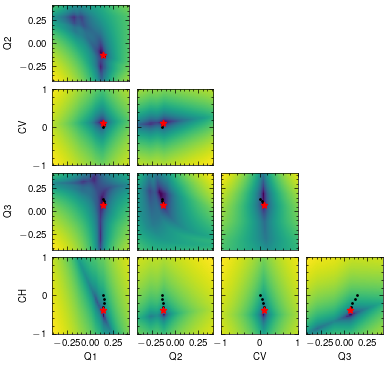

In [11]:
fig = rl_episode.plot_objective_in_space(
    assumed_incoming_beam=trial.incoming_beam,
    assumed_misalignments=trial.misalignments,
    num_objective_samples=50,
    figsize=(345 / 72.72 * 0.9, 345 / 72.72 * 0.9),
)
plt.savefig(f"{FIG_DIR}/rl_objective_exploration.pdf")

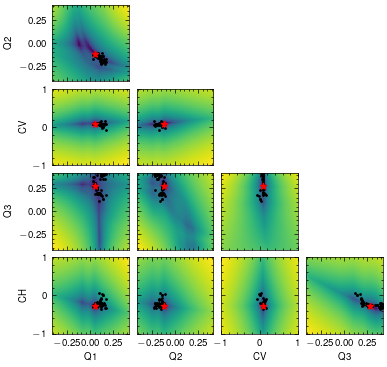

In [12]:
bo_episode.plot_objective_in_space(
    assumed_incoming_beam=trial.incoming_beam,
    assumed_misalignments=trial.misalignments,
    num_objective_samples=50,
    figsize=(345 / 72.72 * 0.9, 345 / 72.72 * 0.9),
)
plt.savefig(f"{FIG_DIR}/bo_objective_exploration.pdf")